In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display

# Packages for custom plot styles
from matplotlib import rc
from matplotlib.gridspec import GridSpec
rc("font", family="serif", size=11)

In [20]:
nstars = 340
nparams = nstars*11+(3*3)+1
print(nparams)

#df = pd.read_csv('../data/stanfits/tau_models_200.csv', names=['kic', 'dnu',
#                    'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df = pd.read_csv('../data/stanfits/rgb_tau.csv', names=['kic', 'dnu',
                    'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df['kic'] = df['kic'].astype(int)
#display(df.describe())

hier = pd.read_csv('../data/stanfits/rgb_summ_tau.txt', skiprows=4, nrows=nparams, delim_whitespace=True)
#hier = pd.read_csv('../data/stanfits/tests/ngc6819_summ_notau.txt', skiprows=4, nrows=nparams, delim_whitespace=True)
#display(hier.iloc[251])
epsA = hier.loc['epsA']['mean']#:'sd']
epsB = hier.loc['epsB']['mean']
alA = hier.loc['alA']['mean']
alB = hier.loc['alB']['mean']
AA = hier.loc['AA']['mean']
AB = hier.loc['AB']['mean']
print(epsA, epsB)
print(alA, alB)
print(AA, AB)

3750
-0.22699999999999998 0.191
0.03 0.467
0.08900000000000001 0.767


In [21]:
err_eps = np.ones([nstars])
err_alpha = np.ones([nstars])
err_A = np.ones([nstars])
err_G = np.ones([nstars])
err_phi = np.ones([nstars])
err_tau = np.ones([nstars])

#print(hier.loc['epsilon[148]']['sd'])

for i in np.arange(1,nstars+1,1):
    err_eps[i-1] = (hier.loc['epsilon['+str(i)+']']['sd'])
    err_alpha[i-1] = (hier.loc['alpha['+str(i)+']']['sd'])
    err_A[i-1] = (hier.loc['A['+str(i)+']']['sd'])
    err_G[i-1] = (hier.loc['G['+str(i)+']']['sd'])
    err_phi[i-1] = (hier.loc['phi['+str(i)+']']['sd'])
    err_tau[i-1] = (hier.loc['tau['+str(i)+']']['sd'])
    
print(np.shape(err_eps))

(340,)


In [22]:
dnus = np.linspace(df['dnu'].min(), df['dnu'].max(), 50)
dnus2 = np.linspace(0.1, df['dnu'].max(), 20)
As = AA * dnus**(-AB)
alphas = alA * dnus**(-alB)
epsilons = epsA + epsB*np.log(dnus)
depsilons = epsA + epsB*np.log(df['dnu'])
#df['eps_resi'] = df['epsilon'] - depsilons
#phis = -3.75 + 2.75*np.log(dnus)
phis = -1.9 + 1.5*np.log(dnus)
#plt.scatter(np.log(df['dnu'].loc[(df['phi'] > 0)]), np.log(df['phi'].loc[(df['phi'] > 0)]))
#plt.scatter((df['dnu']), (df['phi']))
#plt.plot(np.log(dnus), -dnus**2, color='r')
#0.601 + 0.632 logΔν
#plt.plot(dnus, phis, color='r')
#plt.xlim(0,10)
#df.loc[df.epsilon > 0.45, 'epsilon'] = df['epsilon'] - 1

#display(df)

In [23]:
apokasc = pd.read_csv('../data/APOKASCfull.csv', usecols=['KIC', 'Teff2', '[M/H]2', 'M2', 'R2'])
apokasc = pd.read_csv('../data/apokasc2.csv', delim_whitespace=True,
                      usecols=['KIC', 'Teff', 'FeH', 'M(cor)', 'ES'])
apokasc = apokasc.replace('        ', np.nan)
apokasc = apokasc.replace('...', np.nan)
#display(apokasc)
metals = []
temps = []
evols = []
for i in df['kic']:
    if any(apokasc['KIC'] == i):
        z = apokasc.loc[(apokasc.KIC == i)]['FeH'].values
        T = apokasc.loc[(apokasc.KIC == i)]['Teff'].values
        evol = apokasc.loc[(apokasc.KIC == i)]['ES'].values
        metals.append(float(z[0]))
        temps.append(float(T[0]))
        evols.append(evol[0])
    else:
        metals.append(np.nan)
        temps.append(np.nan)
        evols.append(np.nan)

df['FeH'] = metals
df['Teff'] = temps
#df['Teff'] = df['Teff'].astype(float)
df['ES'] = evols
df = df.dropna(subset=['tau'])
df['e_eps'] = err_eps
df['e_al'] = err_alpha
df['e_A'] = err_A
df['e_G'] = err_G
df['e_phi'] = err_phi
df['e_tau'] = err_tau

df = df[df.ES != 'REJECT']
df = df.dropna(subset=['FeH', 'Teff', 'ES'])

phirange = []
for i in df['phi']:
    if i < -np.pi:
        nphi = i + 2*np.pi
        phirange.append(nphi)
    elif i > np.pi:
        nphi = i - 2*np.pi
        phirange.append(nphi)
    else: phirange.append(i)
df['phi'] = phirange

df.head(15)
#print(phirange)

,kic,dnu,numax,epsilon,alpha,A,G,phi,tau,FeH,Teff,ES,e_eps,e_al,e_A,e_G,e_phi,e_tau
0,10552202,4.331626,39.234931,0.046946,0.014373,0.024085,2.833407,0.965084,11.606930,-0.440,4755.1,RGB,0.014,0.002,0.004,0.533,0.562,3.669
2,9027871,4.301079,42.883527,0.052288,0.014747,0.029274,3.041397,1.056873,10.615330,0.193,4650.2,RGB,0.014,0.002,0.003,0.251,0.283,3.399
3,5112072,10.062180,126.183800,0.191127,0.009501,0.012673,3.036414,2.329689,9.881780,0.073,4906.1,RGB,0.009,0.008,0.003,0.273,0.290,3.456
4,9157260,18.150047,235.031463,0.343036,0.008178,0.008853,3.379150,2.672231,10.995772,-0.111,4866.9,RGB,0.007,0.007,0.007,0.210,0.124,3.368
5,6929729,6.053103,65.356393,0.142162,0.009076,0.019918,3.292840,1.415389,9.493842,0.171,4732.1,RGB,0.011,0.007,0.003,0.277,0.213,3.582
6,10068810,5.344814,49.254493,0.090788,0.015413,0.023445,2.142350,1.887207,10.528617,-0.222,4612.3,RGB,0.009,0.001,0.003,0.240,0.531,3.578
7,10546977,4.351609,42.906746,0.040663,0.014855,0.028431,2.937272,1.730645,9.034062,0.006,4667.8,RGB,0.014,0.002,0.004,0.332,0.305,4.024
8,3444374,5.738341,56.724357,0.109693,0.012310,0.023021,2.268819,2.946347,2.164076,0.156,4581.2,RGB,0.009,0.001,0.004,0.266,1.152,1.204
9,6343222,7.379511,78.541376,0.135199,0.014130,0.023849,2.733256,1.996948,11.004825,0.299,4607.7,RGB,0.007,0.001,0.003,0.129,0.125,3.591
10,7431665,5.467575,54.951028,0.064024,0.014100,0.026905,2.813276,2.514441,10.541207,-0.009,4712.5,RGB,0.014,0.002,0.004,0.221,0.280,3.557


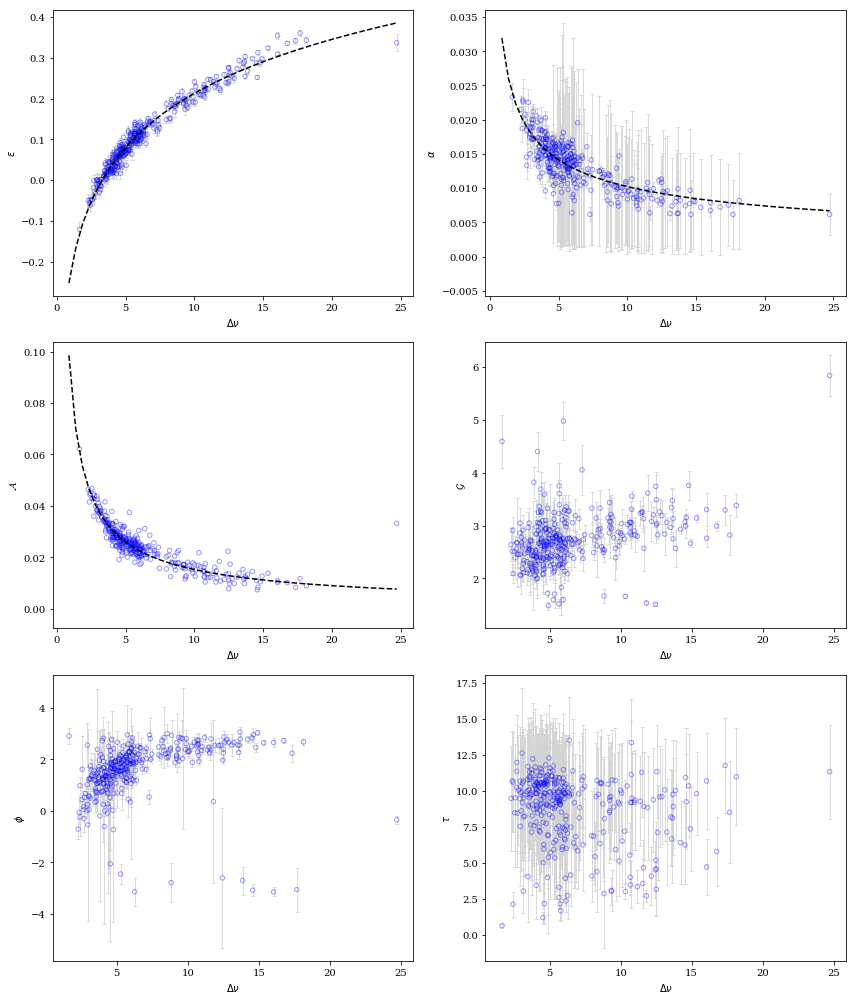

In [24]:
#colours=['red' if i=='RC' else 'orange' if i=='RC(S)' else
#        'blue' if i=='RGB' else 'grey' for i in df['ES']]
kwargs = dict(s=20, facecolors='none', edgecolors='blue', alpha=0.4)
errkwg = dict(fmt="none", c='lightgrey', capsize=2, alpha=0.8, markersize=4, elinewidth=1, zorder=-1)

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(12,14))
ax3.scatter(df['dnu'], df['A'], **kwargs)
ax3.plot(dnus, As, '--', c='k')
ax3.set_xlabel(r'$\Delta\nu$')
ax3.set_ylabel('$\mathcal{A}$')

ax4.scatter(df['dnu'], df['G'], **kwargs)
ax4.errorbar(df['dnu'], df['G'], yerr=df['e_G'], **errkwg)
ax4.set_xlabel(r'$\Delta\nu$')
ax4.set_ylabel('$\mathcal{G}$')

ax5.scatter(df['dnu'], df['phi'], **kwargs)
ax5.errorbar(df['dnu'], df['phi'], yerr=df['e_phi'], **errkwg)
#ax5.plot(dnus, phis, '--', c='k')
ax5.set_xlabel(r'$\Delta\nu$')
ax5.set_ylabel(r'$\phi$')

ax6.scatter(df['dnu'], df['tau'], **kwargs)
ax6.errorbar(df['dnu'], df['tau'], yerr=df['e_tau'], **errkwg)
ax6.set_xlabel(r'$\Delta\nu$')
ax6.set_ylabel(r'$\tau$')

ax1.scatter(df['dnu'], df['epsilon'], **kwargs)
ax1.errorbar(df['dnu'], df['epsilon'], yerr=df['e_eps'], **errkwg)
ax1.plot(dnus, epsilons, '--', c='k')
ax1.set_xlabel(r'$\Delta\nu$')
ax1.set_ylabel(r'$\epsilon$')

ax2.scatter(df['dnu'], df['alpha'], **kwargs)
ax2.errorbar(df['dnu'], df['alpha'], yerr=df['e_al'], **errkwg)
ax2.plot(dnus, alphas, '--', c='k')
ax2.set_xlabel(r'$\Delta\nu$')
ax2.set_ylabel(r'$\alpha$')

plt.tight_layout()
plt.savefig('plots/rgbparameters.pdf')
plt.show()

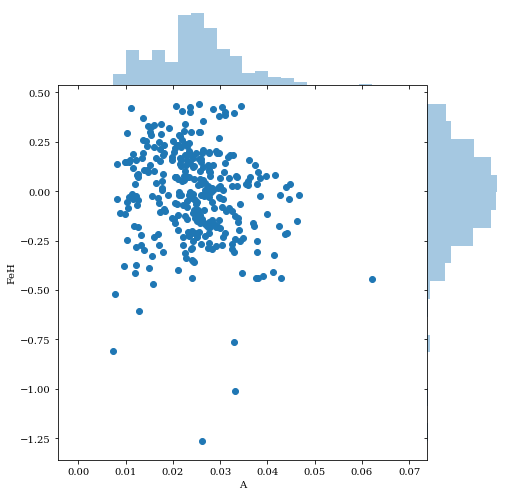

In [25]:
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))
ax1 = sns.jointplot(df['A'], df['FeH'], height=7, space=0)

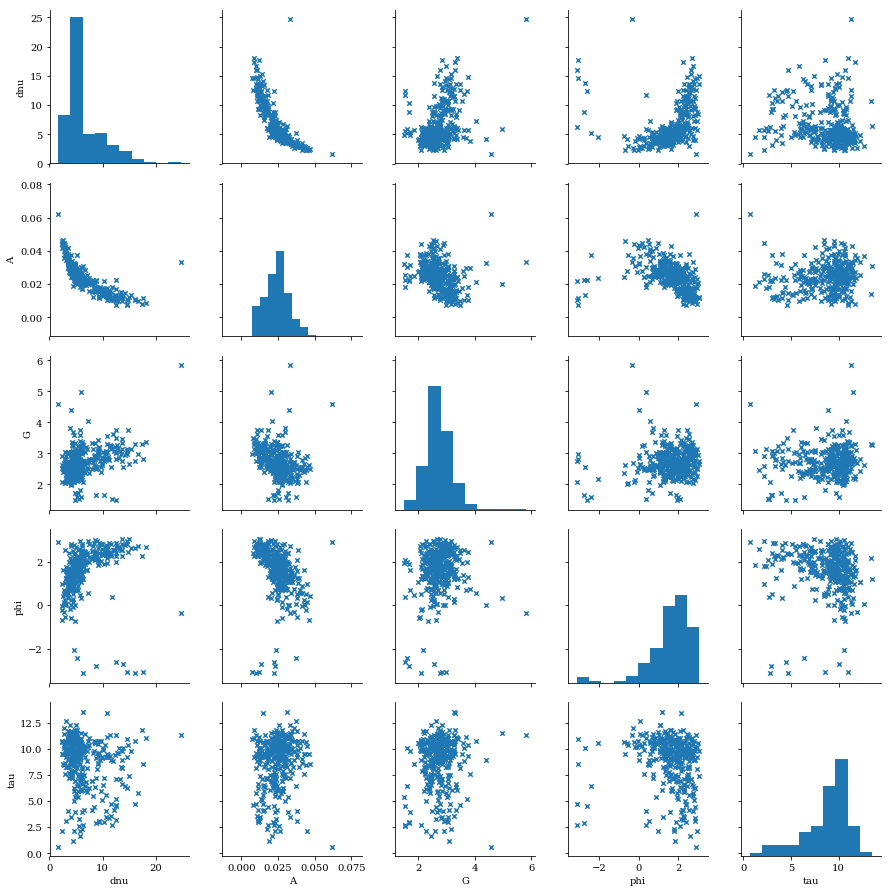

In [26]:
k = np.asarray(df['Teff'].values).astype(float)
k = k/max(k)
#print(k)
g = sns.PairGrid(df, vars=["dnu","A", "G", "phi", "tau"])
#g = g.map_offdiag(plt.scatter, marker='x', s=20, color=k, cmap='viridis')
g = g.map_offdiag(plt.scatter, marker='x', s=20)
g = g.map_diag(plt.hist)

#g = sns.pairplot(df, vars=["dnu","A", "G", "phi", "tau"],
#                  diag_kind='hist', markers='x', hue=df['Teff'])
#                 #plot_kws=dict(s=20, colour=df['Teff'])
#plt.scatter(df['dnu'], df['A'], c=df['Teff'], cmap='viridis')

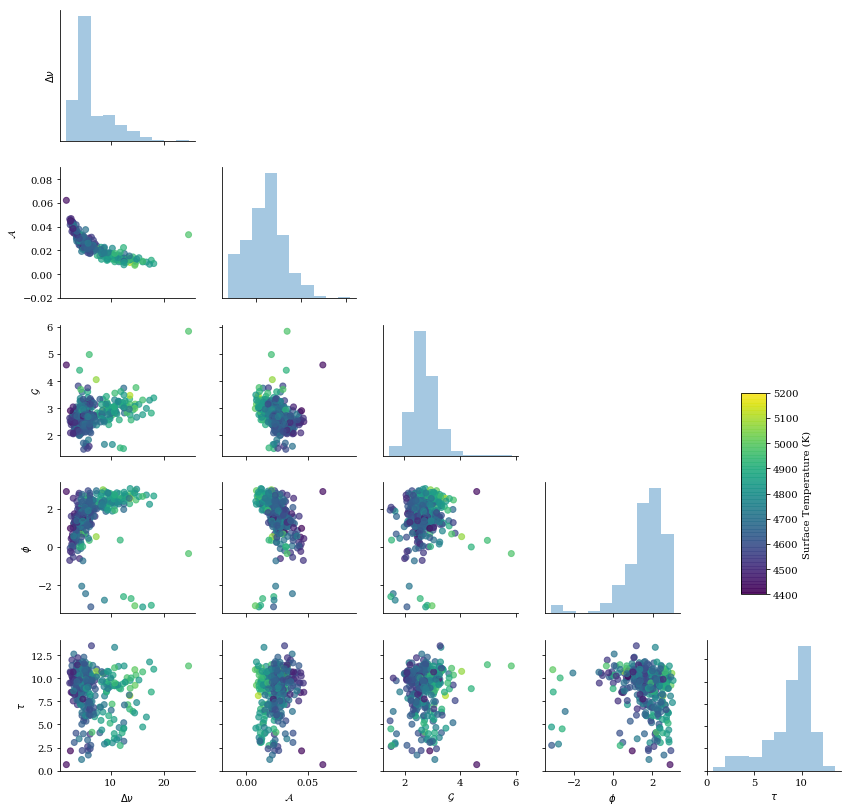

In [27]:
plt.figure(figsize=(14,14))
gs = GridSpec(5, 5)
diag0 = plt.subplot(gs[0, 0:1])
diag1 = plt.subplot(gs[1, 1:2])
diag2 = plt.subplot(gs[2, 2:3])
diag3 = plt.subplot(gs[3, 3:4])
diag4 = plt.subplot(gs[4, 4:5])
ax1a = plt.subplot(gs[1, 0:1])
ax2a = plt.subplot(gs[2, 0:1])
ax2b = plt.subplot(gs[2, 1:2])
ax3a = plt.subplot(gs[3, 0:1])
ax3b = plt.subplot(gs[3, 1:2])
ax3c = plt.subplot(gs[3, 2:3])
ax4a = plt.subplot(gs[4, 0:1])
ax4b = plt.subplot(gs[4, 1:2])
ax4c = plt.subplot(gs[4, 2:3])
ax4d = plt.subplot(gs[4, 3:4])

colours = dict(c=df['Teff'], cmap='viridis', vmin=4400, vmax=5200)
dist_kwargs = dict(kde=False, bins=10)
scat_kwargs = dict(marker='o', alpha=0.7, **colours)

sns.distplot(df['dnu'], ax=diag0, **dist_kwargs)
sns.distplot(df['A'], ax=diag1, **dist_kwargs)
sns.distplot(df['G'], ax=diag2, **dist_kwargs)
sns.distplot(df['phi'], ax=diag3, **dist_kwargs)
sns.distplot(df['tau'], ax=diag4, **dist_kwargs)

a = ax1a.scatter(df['dnu'], df['A'], **scat_kwargs)
ax2a.scatter(df['dnu'], df['G'], **scat_kwargs)
ax2b.scatter(df['A'], df['G'], **scat_kwargs)
ax3a.scatter(df['dnu'], df['phi'], **scat_kwargs)
ax3b.scatter(df['A'], df['phi'], **scat_kwargs)
ax3c.scatter(df['G'], df['phi'], **scat_kwargs)
ax4a.scatter(df['dnu'], df['tau'], **scat_kwargs)
ax4b.scatter(df['A'], df['tau'], **scat_kwargs)
ax4c.scatter(df['G'], df['tau'], **scat_kwargs)
ax4d.scatter(df['phi'], df['tau'], **scat_kwargs)

diags = [diag0, diag1, diag2, diag3]
inner = [ax2b, ax3b, ax3c]
side = [ax1a, ax2a, ax3a]
bottom = [ax4b, ax4c, ax4d, diag4]
ax4a.spines['right'].set_visible(False)
ax4a.spines['top'].set_visible(False)

for i in diags:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelbottom=False, labelleft=False, left=False)
    i.set(xlabel='')
for i in inner:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelbottom=False, labelleft=False)
for i in side:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelbottom=False)
for i in bottom:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelleft=False)

diag0.set_ylabel(r'$\Delta\nu$')
ax1a.set_ylabel(r'$\mathcal{A}$')
ax2a.set_ylabel(r'$\mathcal{G}$')
ax3a.set_ylabel(r'$\phi$')
ax4a.set_ylabel(r'$\tau$')
#ax2b.set_xlim([0.015, 0.035])

ax4a.set_xlabel(r'$\Delta\nu$')
ax4b.set_xlabel(r'$\mathcal{A}$')
ax4c.set_xlabel(r'$\mathcal{G}$')
ax4d.set_xlabel(r'$\phi$')
diag4.set_xlabel(r'$\tau$')

cax = plt.axes([0.8, 0.3, 0.025, 0.2])
cbar = plt.colorbar(a, cax=cax, use_gridspec=True)
cbar.set_label('Surface Temperature (K)')
#plt.tight_layout()
plt.savefig('plots/rgbcorrelations.pdf')
plt.show()

In [ ]:
ft = pd.read_csv('../../ngc6819_notau.csv')
#display(ft['epsilon'])
#ft['epsilon'] = ft['epsilon'] - 1
#display(ft['epsilon'])
t = np.array(ft['epsilon']) - 1
print(t)
ft['epsilon'] = t
display(ft)